In [38]:
from pyspark.sql import SparkSession
from pyspark import *

In [39]:
sparkSession = SparkSession.builder.appName("example").getOrCreate()

In [40]:
df_load = sparkSession.read.csv('hdfs://localhost:9000/user/BTL/data/Tiki.csv', header = True)

In [41]:
df_load['Ten']

Column<'Ten'>

In [42]:
df_load = df_load.toPandas()

In [43]:
df_load

,_c0,Ten,Đánh giá,Giá,Đã bán,Miễn ship
0,0,"Sách - Combo Đắc Nhân Tâm, Quẳng Gánh Lo đi & ...",None,256700 ₫,None,no
1,1,Cây Cam Ngọt Của Tôi,5,73800 ₫,Đã bán 2765,no
2,2,Hành Tinh Của Một Kẻ Nghĩ Nhiều,4.8,58100 ₫,Đã bán 5000+,yes
3,3,Thao Túng Tâm Lý,4.7,100900 ₫,Đã bán 5000+,yes
4,4,Ghi Chép Pháp Y – Những Cái Chết Bí Ẩn,5,105000 ₫,Đã bán 1848,yes
...,...,...,...,...,...,...
2425,2425,Móc khóa gấu bông dễ thương đáng yêu - Móc tre...,5,19000 ₫,Đã bán 217,yes
2426,2426,Tâm Lý Học Hành Vi (Tặng Kèm 1 Bookmark ),5,70500 ₫,Đã bán 5000+,yes
2427,2427,Power Vs Force - Trường Năng Lượng Và Những Nh...,5,124000 ₫,Đã bán 3494,yes
2428,2428,Sách Nghĩ Giàu Và Làm Giàu (Bìa Mềm),4.8,84100 ₫,Đã bán 5000+,yes


In [44]:
length = df_load.shape[0]

In [45]:
for i in range(length):
    df_load['Giá'].values[i] = df_load['Giá'].values[i].split(" ")[0]

In [46]:
df_load

,_c0,Ten,Đánh giá,Giá,Đã bán,Miễn ship
0,0,"Sách - Combo Đắc Nhân Tâm, Quẳng Gánh Lo đi & ...",None,256700,None,no
1,1,Cây Cam Ngọt Của Tôi,5,73800,Đã bán 2765,no
2,2,Hành Tinh Của Một Kẻ Nghĩ Nhiều,4.8,58100,Đã bán 5000+,yes
3,3,Thao Túng Tâm Lý,4.7,100900,Đã bán 5000+,yes
4,4,Ghi Chép Pháp Y – Những Cái Chết Bí Ẩn,5,105000,Đã bán 1848,yes
...,...,...,...,...,...,...
2425,2425,Móc khóa gấu bông dễ thương đáng yêu - Móc tre...,5,19000,Đã bán 217,yes
2426,2426,Tâm Lý Học Hành Vi (Tặng Kèm 1 Bookmark ),5,70500,Đã bán 5000+,yes
2427,2427,Power Vs Force - Trường Năng Lượng Và Những Nh...,5,124000,Đã bán 3494,yes
2428,2428,Sách Nghĩ Giàu Và Làm Giàu (Bìa Mềm),4.8,84100,Đã bán 5000+,yes


Data distribution analysys


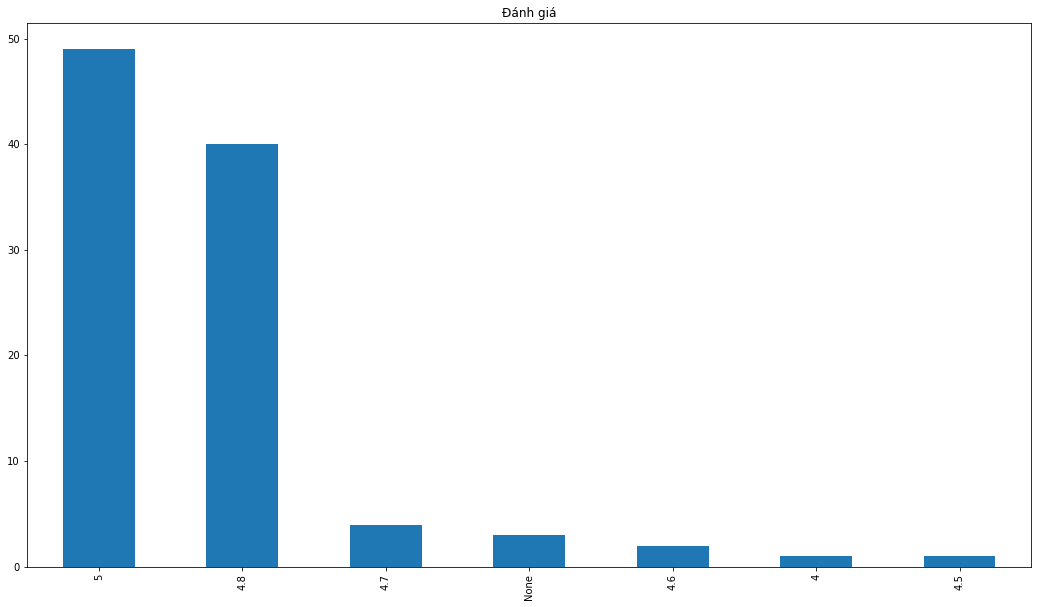

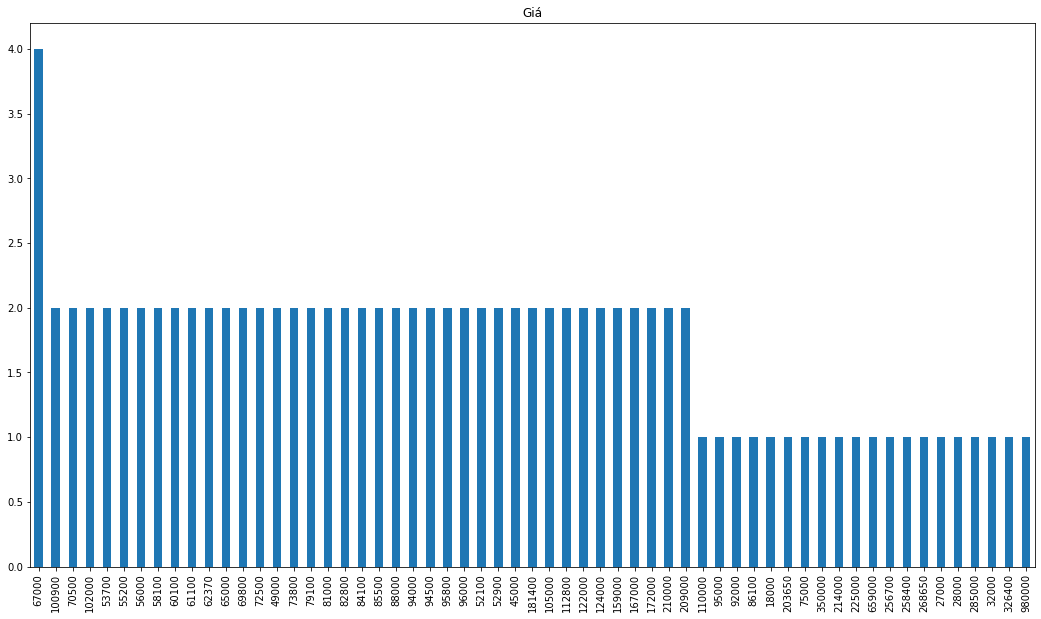

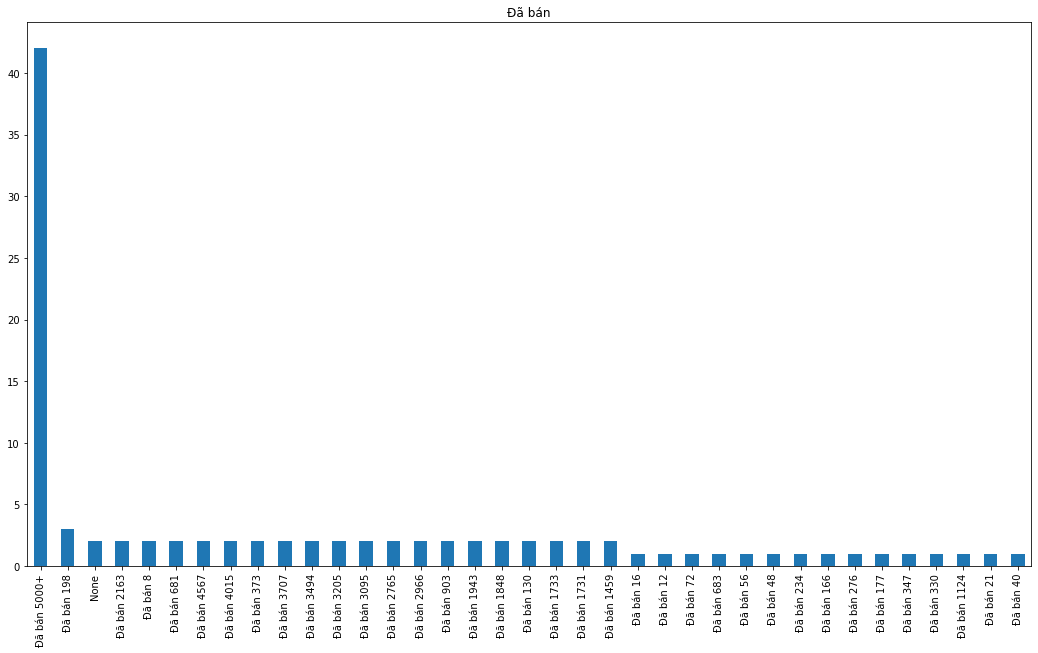

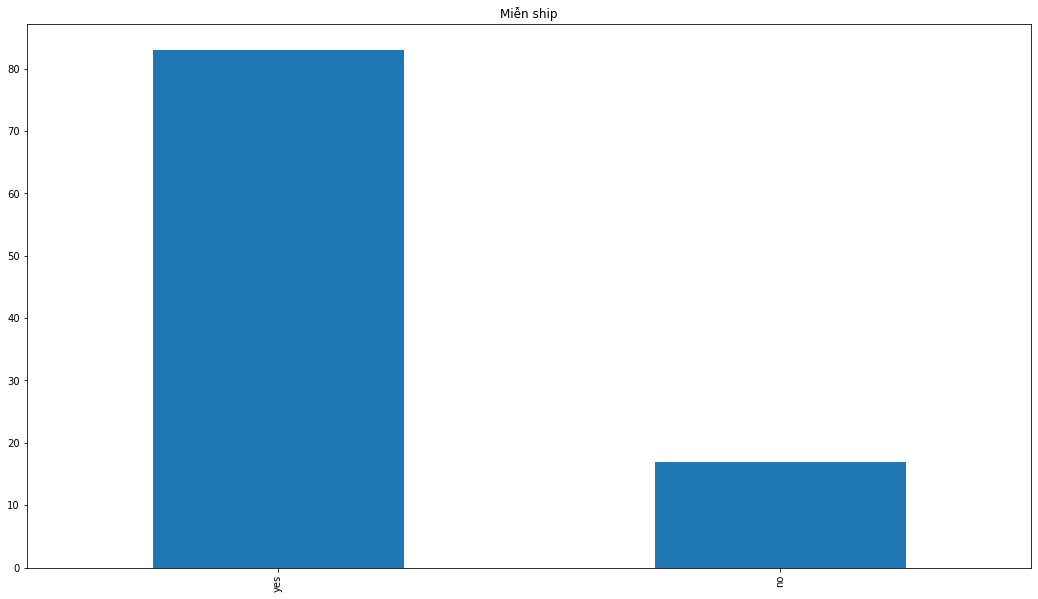

In [49]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (18,10)

attribute = ['Đánh giá', 'Giá', 'Đã bán', 'Miễn ship']

# data distribution analysys
print('Data distribution analysys')
for attr in attribute:
    df_load = df_load.head(100).sort_values(by=[attr])
    df_load[attr].value_counts().plot(kind = 'bar')
    plt.title(attr)
    plt.show()

In [52]:
df_load["Giá"]

85    326400
35    659000
89     52900
88     53700
38     53700
       ...  
42     52100
47    124000
97    124000
43     67000
11     96000
Name: Giá, Length: 100, dtype: object

In [53]:
# Thêm model dự đánh giá của người dùng